# TP2 Interpolation Numérique 

## Exercice 1

In [159]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [160]:

X=[1 ,2 ,3 ,4,-2]
Y=[-1, 0, 2 ,1,3]
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) lorsqu'on déclare la fonction PR **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné elle renvoie un de même longueur

In [75]:
from numpy import prod
def PR(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
        
    return  sum(S)

In [162]:
X=[1 ,2 ,3 ,4]
Y=[-1, 0, 2 ,1]
for i in X:
    print(PR(X,Y,i))

-1.0
0.0
2.0
1.0


2) à la fin de la boucle  Le vecteur  L contient un des 1.

In [163]:
X=[1 ,2 ,3 ,4];
Y=[-1, 0, 2 ,1];

In [165]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        
        S.append(y[j]*prod(L))
    return  L[3]
X=[1 ,2 ,3 ,4];
Y=[-1, 0, 2 ,1];
for i in X:
    print(prog(X,Y,i))

1
1
1
1


3) le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$. est :

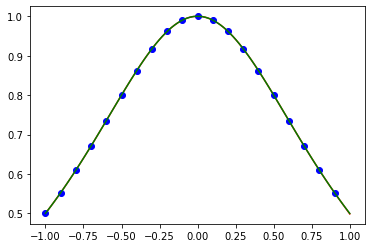

In [78]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(-1,1, 0.1)
f=lambda x: 1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
pt=[]
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,pt,'r',x,y,'bo',t,f(t),'g')
plt.show()

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) le graphe de la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

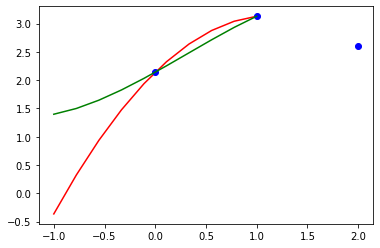

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import math
x=np.array([i for i in range(3)])
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
F=np.vectorize(f)
y=F(x)
t=np.linspace(-1,1,10)
pt=[]
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,pt,'r',x,y,'bo',t,F(t),'g')
plt.show()

2) la courbe d'erreur  (la
 fonction $F-p_n$).

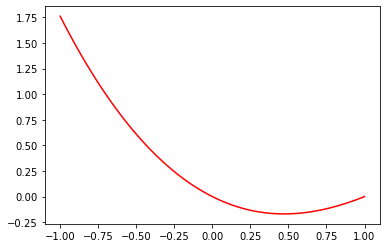

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import math
x=np.array([i for i in range(3)])
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
F=np.vectorize(f)
y=F(x)
t=np.linspace(-1,1,100)
pt=[]
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,F(t)-pt,'r')
plt.show()


## Exercice 2  ( Phenomène de Runge )

1) 

Text(0.5, 1.0, 'Interpolation \n Equidistante avec N=10 \n')

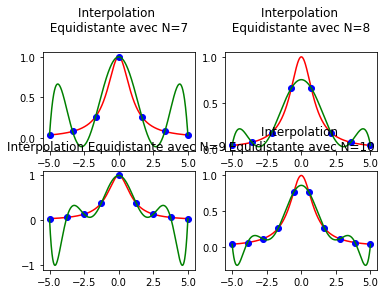

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import math
N=7
X=np.linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation \n Equidistante avec N=7 \n")
##############################
N=8
X=np.linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation \n Equidistante avec N=8 \n")
##############################
N=9;
X=np.linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9 \n")
##############################
N=10;
X=np.linspace(-5,5,N)
f=lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation \n Equidistante avec N=10 \n")

2) 

In [169]:
import numpy as np
import math
def tcheb(a,b,n):
    V=[]
    for k in range(n):
        V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return V
print(tcheb(-5,5,11))

[-4.755282581475767, -5.0, -4.755282581475767, -4.045084971874737, -2.938926261462366, -1.5450849718747373, -3.061616997868383e-16, 1.5450849718747368, 2.938926261462365, 4.045084971874736, 4.755282581475767]


C:\Users\user\anaconda3I\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3I\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3I\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\anaconda3I\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

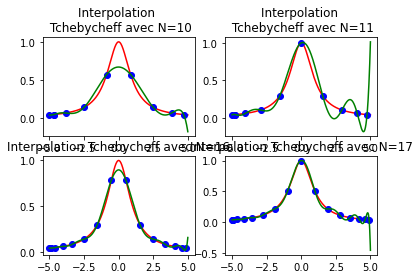

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import math
N=10
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation \n Tchebycheff avec N=10")
##########################################
N=11
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation \n Tchebycheff avec N=11")
##########################################
N=16
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
##########################################
N=17
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")

## Exercice 3

1) 

In [171]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [172]:
x=[-1,0,2,5]
y=[6,1,3,66]
print(intN(x,y))

[ 0.         -5.          0.66666667 10.5       ]


In [173]:
import matplotlib.pyplot as plt
import numpy as np
import math
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p


In [174]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

In [175]:
##Calcul a la main

2) le Graph du polynôme dans l'intervalle $[-1;5]$.

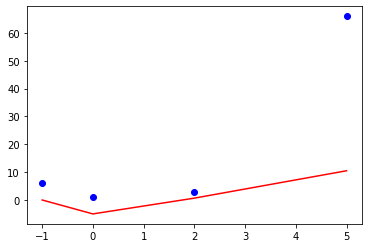

In [176]:
import matplotlib.pyplot as plt
import numpy as np
x=[-1,0,2,5]
y=[6,1,3,66]
f=np.array(intN(x,y))
plt.plot(x,f,'r',x,y,'ob')

3) $P(1)$

In [158]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.